## Setting up the environment for Colab

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
%cd "/content/drive/My Drive/Colab Notebooks/w266_final/project_re"

/content/drive/.shortcut-targets-by-id/1I3W7Z7rz_YfsjBjX7z4zTzGbr-iKTrmD/w266_final/project_re


In [1]:
%reload_ext autoreload
%autoreload
import pickle, os, json
import torch
from pathlib import Path, PureWindowsPath, PurePosixPath
from util.tools import load_config
import pandas as pd

In [2]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"

In [3]:
config_folder = "config/"
config = load_config(config_folder)

In [4]:
reports_folder_name = config.programsettings.REPORTS_DIR
data_folder = Path(reports_folder_name)
list_results_files = list(data_folder.glob('**/test_results*.pkl'))

all_results = []
for results_file in list_results_files:
    print(results_file)
    with open(results_file,"rb") as f:
        lst_results = pickle.load(f)
    for results in lst_results:
        all_results.append([results_file, results[0], results[1], results[2], results[3] ])

columns = ['file_name','model_name','Predicted', 'True', 'input']
pd.options.display.max_colwidth = 250
df_results = pd.DataFrame(all_results, columns = columns)
df_results


reports\re\test_results_2020-11-23 05_43_56_151740.pkl
reports\re\test_results_2020-11-23 05_49_44_036175.pkl
reports\re\test_results_2020-11-23 05_55_31_646110.pkl
reports\re\test_results_2020-11-23 06_01_19_939455.pkl
reports\re\test_results_2020-11-23 06_06_32_040659.pkl
reports\re\test_results_2020-11-23 06_11_44_159352.pkl
reports\re\test_results_2020-11-23 06_16_56_819055.pkl
reports\re\test_results_2020-11-23 06_22_08_922387.pkl
reports\re\test_results_2020-11-23 06_27_21_059745.pkl
reports\re\test_results_2020-11-23 06_32_33_314245.pkl
reports\re\test_results_2020-11-23 06_37_45_563271.pkl
reports\re\test_results_2020-11-23 06_42_57_822165.pkl
reports\re\test_results_2020-11-23 06_47_57_231734.pkl
reports\re\test_results_2020-11-23 06_52_55_145775.pkl
reports\re\test_results_2020-11-23 06_57_53_117925.pkl
reports\re\test_results_2020-11-23 07_02_51_012135.pkl
reports\re\test_results_2020-11-23 07_07_48_929393.pkl
reports\re\test_results_2020-11-23 07_12_46_821315.pkl
reports\re

,file_name,model_name,Predicted,True,input
0,reports\re\test_results_2020-11-23 05_43_56_151740.pkl,outputs\re\BERT_Sequence2020-11-16 05_43_28_786014_bin,5,1,[CLS] In ##sul ##in Breakfast and Bed ##time - O ##B ##J _ B N ##P ##H O ##B ##J _ E 10 Units S ##U ##B _ B Fin ##gers ##tick S ##U ##B _ E before meals and bed - cover with re ##gu ##ls ##r sliding scale In ##sul ##in SC S ##lid ##ing Scale Brea...
1,reports\re\test_results_2020-11-23 05_43_56_151740.pkl,outputs\re\BERT_Sequence2020-11-16 05_43_28_786014_bin,2,8,"[CLS] D ##IS ##CH ##AR ##GE ME ##DI ##CA ##TI ##ON ##S : F ##lut ##ica ##son ##e Sol ##u - Me ##dr ##ol 250 / 50 m ##c ##g disk b . i . d . , t ##iot ##rop ##ium br ##omi ##de 18 m ##c ##g capsule with in ##hala ##tion device daily , _ _ _ _ _ _ ..."
2,reports\re\test_results_2020-11-23 05_43_56_151740.pkl,outputs\re\BERT_Sequence2020-11-16 05_43_28_786014_bin,2,8,[CLS] Release 24 h ##r - 1 ( One ) Cap ##sul ##e ( s ) by mouth twice a day F ##OL ##IC AC ##ID - ( Do ##se adjustment - no new R ##x ) - 1 mg Table ##t - 1 ( One ) Table ##t ( s ) by mouth once a day H ##Y ##DR ##OM ##OR ##P ##H ##ON ##E - 2 mg ...
3,reports\re\test_results_2020-11-23 05_43_56_151740.pkl,outputs\re\BERT_Sequence2020-11-16 05_43_28_786014_bin,5,1,"[CLS] Pat ##ient kept N ##PO , T ##P ##N started , a ##cy ##c ##lov ##ir , c ##ef ##ep ##ime , and O ##B ##J _ B f ##ent ##any ##l O ##B ##J _ E S ##U ##B _ B PC ##A S ##U ##B _ E . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD..."
4,reports\re\test_results_2020-11-23 05_43_56_151740.pkl,outputs\re\BERT_Sequence2020-11-16 05_43_28_786014_bin,5,6,"[CLS] O ##B ##J _ B B ##isa ##co ##dy ##l O ##B ##J _ E 5 mg S ##U ##B _ B Table ##t , Del ##ay ##ed Release ( E . C . ) S ##U ##B _ E [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PA..."
...,...,...,...,...,...
34486,reports\re\test_results_2020-11-25 05_11_14_808756.pkl,outputs\re\BioBERT_fc2020-11-25 04_15_53_420251_bin,4,3,"[CLS] You may also take O ##B ##J _ B ace ##tam ##ino ##phe ##n ( Ty ##len ##ol ) O ##B ##J _ E as directed , but do not exceed 4000 mg in S ##U ##B _ B one day S ##U ##B _ E . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PA..."
34487,reports\re\test_results_2020-11-25 05_11_14_808756.pkl,outputs\re\BioBERT_fc2020-11-25 04_15_53_420251_bin,3,6,[CLS] Me ##dication ##s on Ad ##mission : AL ##B ##UT ##ER ##OL S ##U ##LF ##AT ##E - 0 . 63 mg / 3 m ##L Sol ##ution for N ##eb ##uli ##zation - [ * * 11 - 24 * * ] Sol ##ution ( s ) inhaled every 4 - 6 hours as needed for short ##ness of breath...
34488,reports\re\test_results_2020-11-25 05_11_14_808756.pkl,outputs\re\BioBERT_fc2020-11-25 04_15_53_420251_bin,1,5,[CLS] O ##B ##J _ B I ##pra ##tro ##pi ##um - Al ##but ##ero ##l O ##B ##J _ E 0 . 5 - 2 . 5 mg / 3 m ##L Sol ##ution for N ##eb ##uli ##zation [ * * Doctor Last Name * * ] : One ( 1 ) S ##U ##B _ B In ##hala ##tion S ##U ##B _ E four times a day...
34489,reports\re\test_results_2020-11-25 05_11_14_808756.pkl,outputs\re\BioBERT_fc2020-11-25 04_15_53_420251_bin,8,0,[CLS] Per ##tinent Results : [ * * 211 ##8 - 4 - 18 * * ] 04 : 35 ##AM W ##BC - 9 . 7 RB ##C - 2 . 73 * H ##GB - 7 . 7 * HC ##T - 22 . 4 * MC ##V - 83 MC ##H - 28 . 4 MC ##HC - 34 . 2 R ##D ##W - 14 . 6 [ * * 211 ##8 - 4 - 18 * * ] 04 : 35 ##AM H...


In [5]:
df_results[ (df_results["True"] == 7) ]

,file_name,model_name,Predicted,True,input
5,reports\re\test_results_2020-11-23 05_43_56_151740.pkl,outputs\re\BERT_Sequence2020-11-16 05_43_28_786014_bin,0,7,"[CLS] - * Given patient ' s significant S ##U ##B _ B re ##tro ##per ##ito ##nea ##l bleed S ##U ##B _ E with h ##ct drop and h ##y ##pot ##ens ##ion , the patient ' s O ##B ##J _ B co ##uma ##din O ##B ##J _ E , as ##pi ##rin and p ##lav ##ix we..."
6,reports\re\test_results_2020-11-23 05_43_56_151740.pkl,outputs\re\BERT_Sequence2020-11-16 05_43_28_786014_bin,0,7,"[CLS] This medication can cause S ##U ##B _ B con ##st ##ip ##ation S ##U ##B _ E , so you should drink plenty of water daily and take a stool soft ##ener ( e . g . , co ##lace ) as needed to prevent this side effect . As your pain improve ##s , ..."
10,reports\re\test_results_2020-11-23 05_43_56_151740.pkl,outputs\re\BERT_Sequence2020-11-16 05_43_28_786014_bin,8,7,[CLS] Per ##tinent Results : [ * * 214 ##4 - 8 - 10 * * ] 05 : 35 ##AM B ##L ##O ##OD W ##BC - 6 . 1 RB ##C - 3 . 45 * H ##g ##b - 9 . 4 * H ##ct - 28 . 9 * MC ##V - 84 MC ##H - 27 . 3 MC ##HC - 32 . 6 R ##D ##W - 15 . 2 P ##lt C ##t - 300 [ * * ...
17,reports\re\test_results_2020-11-23 05_43_56_151740.pkl,outputs\re\BERT_Sequence2020-11-16 05_43_28_786014_bin,0,7,[CLS] Of note her S ##U ##B _ B e ##ff ##usion S ##U ##B _ E ##s persisted despite anti ##biotic therapy and O ##B ##J _ B NSA ##ID O ##B ##J _ E therapy . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] ...
19,reports\re\test_results_2020-11-23 05_43_56_151740.pkl,outputs\re\BERT_Sequence2020-11-16 05_43_28_786014_bin,0,7,[CLS] Pat ##ient additionally expressed concern re : potential side effects re : S ##U ##B _ B Ray ##na ##ud ' s S ##U ##B _ E and beta blockade . Pat ##ient experienced O ##B ##J _ B Met ##op ##rol ##ol O ##B ##J _ E related G ##I upset / d ##ys...
...,...,...,...,...,...
34459,reports\re\test_results_2020-11-25 05_11_14_808756.pkl,outputs\re\BioBERT_fc2020-11-25 04_15_53_420251_bin,0,7,"[CLS] "" "" "" S ##U ##B _ B r ##ash S ##U ##B _ E "" "" - in MI ##CU p ##t became pink throughout the body / face . After 5 days c ##lind ##a was stopped and p ##t was switched over to Di ##c ##lo ##x P ##O and sent home with P ##O O ##B ##J _ B anti..."
34461,reports\re\test_results_2020-11-25 05_11_14_808756.pkl,outputs\re\BioBERT_fc2020-11-25 04_15_53_420251_bin,0,7,"[CLS] Return ##s with near s ##ync ##op ##al episodes and S ##U ##B _ B sin ##us bra ##dy ##card ##ia S ##U ##B _ E , likely medication related . Disc ##har ##ged on [ * * 2 - 15 * * ] on O ##B ##J _ B Do ##fe ##tel ##ide O ##B ##J _ E , Card ##i..."
34463,reports\re\test_results_2020-11-25 05_11_14_808756.pkl,outputs\re\BioBERT_fc2020-11-25 04_15_53_420251_bin,0,7,[CLS] BR ##IE ##F S ##UM ##MA ##R ##Y OF H ##OS ##PI ##TA ##L CO ##UR ##SE : The patient was admitted for his S ##U ##B _ B acute re ##nal ins ##uff ##iciency S ##U ##B _ E . His O ##B ##J _ B Las ##ix O ##B ##J _ E and his Al ##da ##cton ##e wer...
34479,reports\re\test_results_2020-11-25 05_11_14_808756.pkl,outputs\re\BioBERT_fc2020-11-25 04_15_53_420251_bin,0,7,[CLS] H / o O ##B ##J _ B as ##pi ##rin O ##B ##J _ E S ##U ##B _ B all ##er ##gy S ##U ##B _ E - p ##t underwent O ##B ##J _ B as ##pi ##rin O ##B ##J _ E des ##ens ##iti ##zation the night before his cat ##he ##ter ##ization . [SEP] [PAD] [PAD]...


In [6]:
df_results[ (df_results["True"] == 7) ].groupby("Predicted").count()['True']

Predicted
0    7242
1      19
3      43
4       5
5      12
6       2
8     168
Name: True, dtype: int64

In [7]:
df_results[ (df_results["True"] == 7) ].groupby("input").count().apply(lambda x: x.sort_values(ascending=False).head(20))

,file_name,model_name,Predicted,True
input,,,,
"[CLS] It is unclear if there is a behavioral component to her S ##U ##B _ B u ##rina ##ry retention S ##U ##B _ E . All anti ##cho ##liner ##gic ##s were stopped , including O ##B ##J _ B Co ##gent ##in O ##B ##J _ E , with some improvement in her bladder volumes . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]",42,42,42,42
"[CLS] Physical Ex ##am : Vita ##ls : T : 99 . 8 , BP : 149 / 69 , P : 87 , R : 15 , O ##2 : 97 % RA General : So ##m ##no ##lent , moving all ex ##tre ##mit ##ies spontaneous ##ly but is not re ##sp ##ons ##ive to painful stimuli , no acute distress H ##EE ##NT : Well - healed surgical scar on the superior aspect of the head , s ##cle ##ra an ##ict ##eric , pupils 2 ##mm and minimal ##ly re ##sp ##ons ##ive , M ##MM , or ##op ##har ##ynx clear Neck : surgical scar in the left neck , su ##pp ##le , J ##VP not elevated , no LA ##D Lu ##ng ##s : coarse upper air ##way sounds , no w ##hee ##zes , r ##ales , r ##on ##chi C ##V : Regular rate and rhythm , normal S ##1 + S ##2 , no murmurs , rub ##s , gal ##lops Abd ##ome ##n : soft , non - tender , non - di ##sten ##ded , bow ##el sounds present , no re ##bound tender ##ness or guarding , no organ ##ome ##gal ##y Ex ##t : Warm , well per ##fused , 2 + pulses , no club ##bing , c ##yan ##osis or ed ##ema ; 10 ##c ##m sub ##cut ##aneous mass in the left a ##xi ##lla , 6 - 8 ##c ##m sub ##cut ##aneous mass in the left [SEP]",42,42,42,42
"[CLS] In my opinion , the risk of re ##current significant S ##U ##B _ B R ##P bleed S ##U ##B _ E out ##wei ##gh ##s the card ##io ##em ##bolic benefits in the setting of the patient ' s a - fi ##b . The patient can be restart ##ed on as ##pi ##rin + / - O ##B ##J _ B p ##lav ##ix O ##B ##J _ E per PC ##P discretion at future out ##patient PC ##P [ * * Name Initial ( PR ##E ) * * ] . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]",42,42,42,42
[CLS] Initially S ##U ##B _ B h #

In [8]:
df_results[ (df_results["True"] == 7) ].groupby("model_name").count().apply(lambda x: x.sort_values(ascending=False).head(50))['Predicted']

model_name
outputs\re\BioBERT_CNN_fc2020-11-23 20_32_17_598176_bin                  775
outputs\re\BioBERT_CNN_fc2020-11-23 23_16_23_167740_bin                  775
outputs\re\BioBERT_CNN_fc2020-11-24 03_13_56_562308_bin                  775
outputs\re\test_evaluated\BERT_Sequence2020-11-16 05_43_28_786014_bin    274
outputs\re\BioBERT_fc2020-11-22 23_49_51_449255_bin                      242
outputs\re\BioBERT_fc2020-11-23 02_11_58_926877_bin                      224
outputs\re\BioBERT_fc2020-11-16 00_40_57_659995_bin                      166
outputs\re\test_evaluated\BioBERT_fc2020-11-16 00_40_57_659995_bin       166
outputs\re\test_evaluated\BERT_Sequence2020-11-16 22_21_41_536138_bin    150
outputs\re\BERT_Sequence2020-11-16 22_21_41_536138_bin                   150
outputs\re\BERT_Sequence2020-11-20 12_33_00_408665_bin                   145
outputs\re\test_evaluated\BERT_Sequence2020-11-20 12_33_00_408665_bin    145
outputs\re\test_evaluated\BioBERT_fc2020-11-16 20_17_53_374127_bi

In [10]:
df_results[ (df_results["True"] == 7) & (df_results["model_name"] == 'outputs\\re\\BioBERT_fc2020-11-25 01_06_44_926278_bin')]["Predicted"].value_counts()

0    107
8      2
3      1
1      1
Name: Predicted, dtype: int64

In [56]:
df_results[ (df_results["True"] == 7) ]["Predicted"].value_counts()

0    2300
8      74
3      16
1       4
5       3
4       2
Name: Predicted, dtype: int64

## Misclassification with model: sequence length 256, epochs 5, 1FC 

In [57]:
df_results[df_results['Predicted']==df_results['True']]

,file_name,model_name,Predicted,True,input


In [58]:
df_results['model_name'].value_counts()

outputs\re\BioBERT_fc2020-11-16 00_40_57_659995_bin       1012
outputs\re\BERT_Sequence2020-11-20 04_03_11_148846_bin     793
outputs\re\BERT_Sequence2020-11-16 22_21_41_536138_bin     789
outputs\re\BERT_Sequence2020-11-20 12_33_00_408665_bin     786
outputs\re\BERT_Sequence2020-11-16 05_43_28_786014_bin     773
outputs\re\BioBERT_fc2020-11-23 02_11_58_926877_bin        754
outputs\re\BioBERT_fc2020-11-22 01_29_37_863601_bin        753
outputs\re\BioBERT_fc2020-11-21 22_06_59_632738_bin        745
outputs\re\BioBERT_5epochs_256seq_bin                      730
outputs\re\BioBERT_fc2020-11-20 01_41_02_300023_bin        726
outputs\re\BioBERT_fc2020-11-16 20_17_53_374127_bin        725
outputs\re\BioBERT_fc2020-11-20 08_58_14_655591_bin        723
outputs\re\BioBERT_fc2020-11-16 03_37_07_579463_bin        720
outputs\re\BioBERT_fc2020-11-22 23_49_51_449255_bin        720
outputs\re\BioBERT_5epochs_bin                             716
outputs\re\BioBERT_fc2020-11-16 16_17_55_396529_bin    

In [59]:
misclass_m1 = df_results[(df_results['model_name'] == 'outputs\\re\\BioBERT_5epochs_256seq_bin')]

In [60]:
len(misclass_m1)

730

In [61]:
pd.set_option('display.max_colwidth', -1)
#misclass_ade_m1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [62]:
misclass_m1['cleaned_input'] = misclass_m1['input'].str.replace(' ##', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
misclass_m1['cleaned_input'] = misclass_m1['cleaned_input'].str.replace('\[PAD\]', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Calculate sequence length

In [64]:
misclass_m1['seq_length'] = misclass_m1['cleaned_input'].str.len()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
misclass_m1.head()

,file_name,model_name,Predicted,True,input,cleaned_input,seq_length
11391,reports/re/test_results_2020-11-23 06_11_44_159352.pkl,outputs\re\BioBERT_5epochs_256seq_bin,8,2,"[CLS] Relations ##hip : daughter Phone : [ * * Telephone / F ##ax ( 1 ) 243 ##12 * * ] Me ##dication ##s on Ad ##mission : Ali ##ski ##ren * N ##F * 150 mg Oral q ##d [ * * 9 - 5 * * ] @ 112 ##8 War ##fari ##n 2 . 5 mg P ##O 4 ##X / W ##EE ##K ( [ * * Doctor First Name * * ] , M ##O , W ##E , F ##R ) War ##fari ##n 2 mg P ##O D ##A ##Y ##S ( T ##U , T ##H , SA ) [ * * 9 - 5 * * ] @ 112 ##8 Am ##lo ##di ##pine 2 . 5 mg P ##O D ##A ##IL ##Y [ * * 9 - 5 * * ] @ 112 ##8 At ##or ##vas ##tat ##in 80 mg P ##O D ##A ##IL ##Y [ * * 9 - 5 * * ] @ 112 ##8 Lev ##oth ##yr ##ox ##ine So ##dium 112 m ##c ##g P ##O D ##A ##IL ##Y [ * * 9 - 5 * * ] @ 112 ##8 C ##lop ##ido ##g ##rel 75 mg P ##O D ##A ##IL ##Y [ * * 9 - 5 * * ] @ 112 ##8 Po ##tas ##sium Ch ##lor ##ide 20 m ##E ##q P ##O B ##ID Du ##ration : 24 Hours Met ##op ##rol ##ol Su ##cci ##nate X ##L 50 mg [SEP]","[CLS] Relationship : daughter Phone : [ * * Telephone / Fax ( 1 ) 24312 * * ] Medications on Admission : Aliskiren * NF * 150 mg Oral qd [ * * 9 - 5 * * ] @ 1128 Warfarin 2 . 5 mg PO 4X / WEEK ( [ * * Doctor First Name * * ] , MO , WE , FR ) Warfarin 2 mg PO DAYS ( TU , TH , SA ) [ * * 9 - 5 * * ] @ 1128 Amlodipine 2 . 5 mg PO DAILY [ * * 9 - 5 * * ] @ 1128 Atorvastatin 80 mg PO DAILY [ * * 9 - 5 * * ] @ 1128 Levothyroxine Sodium 112 mcg PO DAILY [ * * 9 - 5 * * ] @ 1128 Clopidogrel 75 mg PO DAILY [ * * 9 - 5 * * ] @ 1128 Potassium Chloride 20 mEq PO BID Duration : 24 Hours Metoprolol Succinate XL 50 mg [SEP]",616
11392,reports/re/test_results_2020-11-23 06_11_44_159352.pkl,outputs\re\BioBERT_5epochs_256seq_bin,6,2,"[CLS] Pol ##ys ##por ##in was discontinued ( with concern for h ##yper ##sen ##si ##ti ##v ##ty per discussion with daughter ) and other me ##ds ( O ##B ##J _ B Pre ##d O ##B ##J _ E S ##U ##B _ B 1 S ##U ##B _ E % T ##ID OS , Tim ##olo ##l 0 . 5 % [ * * Hospital ##SU ##B _ B 1 S ##U ##B _ E * * ] O ##U , X ##ala ##tan Q ##HS OS , To ##bra ##de ##x [ * * Doctor Last Name * * ] OS Q ##HS ) continued . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]","[CLS] Polysporin was discontinued ( with concern for hypersensitivty per discussion with daughter ) and other meds ( OBJ _ B Pred OBJ _ E SUB _ B 1 SUB _ E % TID OS , Timolol 0 . 5 % [ * * HospitalSUB _ B 1 SUB _ E * * ] OU , Xalatan QHS OS , Tobradex [ * * Doctor Last Name * * ] OS QHS ) continued . [SEP]",453
11393,reports/re/test_results_2020-11-23 06_11_44_159352.pkl,outputs\re\BioBERT_5epochs_256seq_bin,8,1,[CLS] Me ##dication ##s on Ad ##mission : Pro ##gra ##f 1 ##m ##g [ * * Hospital ##1 * * ] I ##mura ##n 50 ##m ##g [ * * Hospital ##1 * * ] Cell ##ce ##pt ( my ##co ##phe ##ni ##date m ##of ##eti ##l ) 1000 ##m ##g [ * * Hospital ##1 * * ] b ##act ##rim met ##op ##rol ##ol 50 ##m ##g [ * * Hospital ##1 * * ] C ##lind ##age ##l as ##a 81 ##m ##g daily f ##osa ##max 35 ##m ##g q f ##ri ma ##rino ##l 5 ##m ##g q ##pm and q ##hs si ##met ##hic ##one 80 ##m ##g [ * * Hospital ##1 * * ] ca ##l ##cum 500 ##m ##g + D [ * * Hospital ##1

In [66]:
misclass_m1[(misclass_m1['True']==7)]['cleaned_input'].head()

11396    [CLS] SUB _ B Intracranial hemorrage SUB _ E : While on a OBJ _ B heparin OBJ _ E drip for DVT , the patient was noted to have anisocoria . [SEP]                                                                                                                                                                                                                                                                                                                                                                                                             
11401    [CLS] The patient ' s platelets declined to 90 while in the MICU and he was found to be SUB _ B HIT SUB _ E antibody positive . OBJ _ B Heparin OBJ _ E products were held and the patient ' s platelet count stabilized . [SEP]                                                                                                                                                                                                                       

In [67]:
misclass_m1['seq_length'].groupby(misclass_m1['True']).mean()

True
0    476.818182
1    463.726190
2    556.918367
3    576.417910
4    474.294118
5    480.946108
6    500.696970
7    430.294643
8    653.555556
Name: seq_length, dtype: float64

In [68]:
misclass_m1['seq_length'].groupby(misclass_m1['True']).min()

True
0    309
1    297
2    288
3    296
4    293
5    289
6    288
7    320
8    493
Name: seq_length, dtype: int64

In [69]:
misclass_m1['seq_length'].groupby(misclass_m1['True']).max()

True
0    856
1    769
2    941
3    753
4    750
5    868
6    757
7    868
8    746
Name: seq_length, dtype: int64

In [70]:
misclass_ade_m1 = misclass_m1[(misclass_m1['True']==7)].copy()

In [71]:
misclass_ade_m1['Predicted'].value_counts()

0    107
8    4  
3    1  
Name: Predicted, dtype: int64

In [72]:
misclass_ade_m1['seq_length'].groupby(misclass_ade_m1['Predicted']).mean()

Predicted
0    421.897196
3    350.000000
8    675.000000
Name: seq_length, dtype: float64

In [73]:
misclass_ade_m1[['cleaned_input', 'seq_length']]

,cleaned_input,seq_length
11396,"[CLS] SUB _ B Intracranial hemorrage SUB _ E : While on a OBJ _ B heparin OBJ _ E drip for DVT , the patient was noted to have anisocoria . [SEP]",346
11401,[CLS] The patient ' s platelets declined to 90 while in the MICU and he was found to be SUB _ B HIT SUB _ E antibody positive . OBJ _ B Heparin OBJ _ E products were held and the patient ' s platelet count stabilized . [SEP],415
11408,[CLS] # # SUB _ B Thrombocytopenia SUB _ E : Patient ' s platelet count was 122K on admission and dropped three days later to 62K . Was placed on argatroban gtt and aggrenox and bridged to OBJ _ B coumadin OBJ _ E while HIT Ab test was pending . [SEP],424
11409,"[CLS] SUB _ B ANAPHYLAXIS SUB _ E TO OBJ _ B BACTRIM OBJ _ E : Patient developed fever / tachycardia / hypotension on hospital day # 2 ; initial suspicion for sepsis syndrome , however blood cultures remained negative and hemodynamic recovery achieved with massive fluid resuscitation in the ICU - of note , patient had received dose of Bactrim for PCP prophylaxis preceding his hypotension . [SEP]",542
11418,"[CLS] Upon return to the floor , he received an additional dose of OBJ _ B Bactrim OBJ _ E - with recurrence of SUB _ B fever SUB _ E / tachycardia / hypotension , again requiring ICU stay for massive fluid resuscitation . [SEP]",416
...,...,...
12101,[CLS] EKG should be checked if the patient receives OBJ _ B haldol OBJ _ E on a regular basis ( risk for SUB _ B prolonged QT SUB _ E ) . [SEP],352
12103,[CLS] Transitional Issues : - The patient had transfusion reaction to OBJ _ B platelet OBJ _ Es ; a blood bank work up was initiated and she was found to be SUB _ B PRA positive SUB _ E ; she will require HLA matched OBJ _ B platelet OBJ _ Es for all subsequent transfusions . [SEP],457
12108,"[CLS] Initially he was SUB _ B hypotensive SUB _ E which was treated with IV fluids and discontinued OBJ _ B propofol OBJ _ E , switching to fentanyl / versed for sedation . [SEP]",380
12117,[CLS] * DM - Pt had several episodes of SUB _ B hypoglycemia SUB _ E on OBJ _ B lantus OBJ _ E due to decreasing oral intake . [SEP],340


## Comparing sequence lengths

In [74]:
!pwd

/content/drive/.shortcut-targets-by-id/1I3W7Z7rz_YfsjBjX7z4zTzGbr-iKTrmD/w266_final/project_re


In [75]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
dev_df = pd.read_csv("data_divided/dev.tsv", sep = "\t", header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [76]:
dev_df = dev_df.rename(columns={0: "id", 1: "relation_code", 2: "alpha", 3:"string"})

In [77]:
dev_df['seq_length'] = dev_df['string'].str.len()

In [78]:
dev_df['seq_length'].groupby(dev_df['relation_code']).mean()

relation_code
0    207.584139
1    202.951092
2    225.322721
3    242.643026
4    203.617647
5    204.937107
6    176.986066
7    205.900000
8    90.236098 
Name: seq_length, dtype: float64

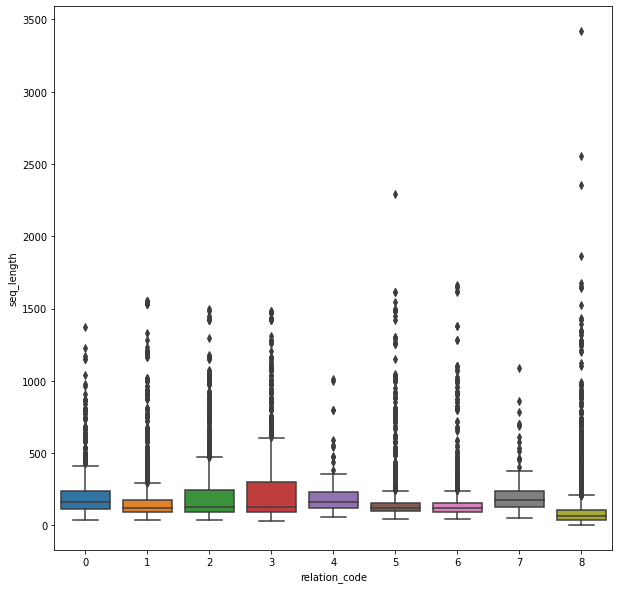

In [79]:
#Dev dataset plot
import seaborn as sns
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1 = sns.boxplot(x = 'relation_code', y = 'seq_length' , data = dev_df)

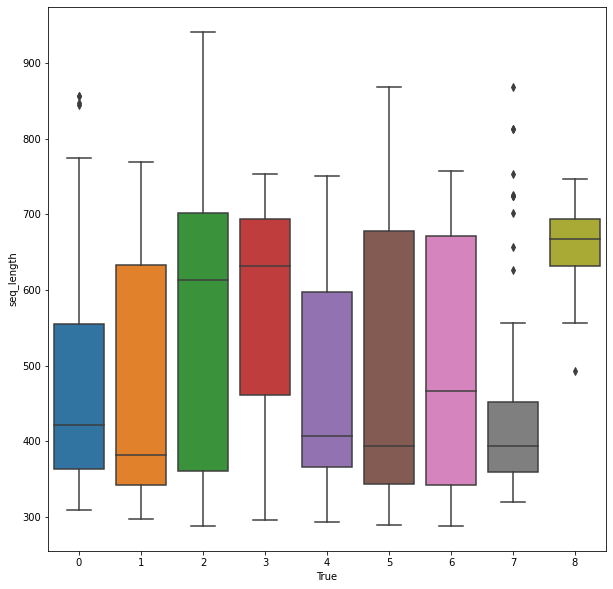

In [80]:
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1 = sns.boxplot(x = 'True', y = 'seq_length' , data = misclass_m1)

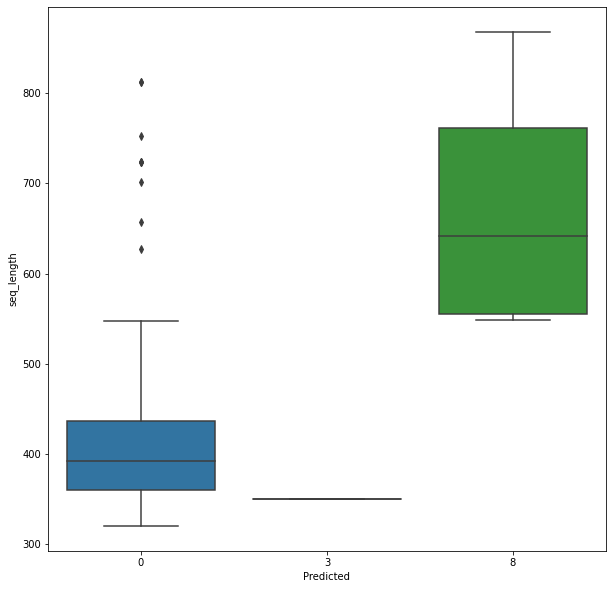

In [81]:
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1 = sns.boxplot(x = 'Predicted', y = 'seq_length' , data = misclass_ade_m1)

In [82]:
misclass_ade_m1[['cleaned_input', 'seq_length']]

,cleaned_input,seq_length
11396,"[CLS] SUB _ B Intracranial hemorrage SUB _ E : While on a OBJ _ B heparin OBJ _ E drip for DVT , the patient was noted to have anisocoria . [SEP]",346
11401,[CLS] The patient ' s platelets declined to 90 while in the MICU and he was found to be SUB _ B HIT SUB _ E antibody positive . OBJ _ B Heparin OBJ _ E products were held and the patient ' s platelet count stabilized . [SEP],415
11408,[CLS] # # SUB _ B Thrombocytopenia SUB _ E : Patient ' s platelet count was 122K on admission and dropped three days later to 62K . Was placed on argatroban gtt and aggrenox and bridged to OBJ _ B coumadin OBJ _ E while HIT Ab test was pending . [SEP],424
11409,"[CLS] SUB _ B ANAPHYLAXIS SUB _ E TO OBJ _ B BACTRIM OBJ _ E : Patient developed fever / tachycardia / hypotension on hospital day # 2 ; initial suspicion for sepsis syndrome , however blood cultures remained negative and hemodynamic recovery achieved with massive fluid resuscitation in the ICU - of note , patient had received dose of Bactrim for PCP prophylaxis preceding his hypotension . [SEP]",542
11418,"[CLS] Upon return to the floor , he received an additional dose of OBJ _ B Bactrim OBJ _ E - with recurrence of SUB _ B fever SUB _ E / tachycardia / hypotension , again requiring ICU stay for massive fluid resuscitation . [SEP]",416
...,...,...
12101,[CLS] EKG should be checked if the patient receives OBJ _ B haldol OBJ _ E on a regular basis ( risk for SUB _ B prolonged QT SUB _ E ) . [SEP],352
12103,[CLS] Transitional Issues : - The patient had transfusion reaction to OBJ _ B platelet OBJ _ Es ; a blood bank work up was initiated and she was found to be SUB _ B PRA positive SUB _ E ; she will require HLA matched OBJ _ B platelet OBJ _ Es for all subsequent transfusions . [SEP],457
12108,"[CLS] Initially he was SUB _ B hypotensive SUB _ E which was treated with IV fluids and discontinued OBJ _ B propofol OBJ _ E , switching to fentanyl / versed for sedation . [SEP]",380
12117,[CLS] * DM - Pt had several episodes of SUB _ B hypoglycemia SUB _ E on OBJ _ B lantus OBJ _ E due to decreasing oral intake . [SEP],340


In [86]:
#Reason
dev_df[dev_df['relation_code']==0].iloc[0:20,:]

,id,relation_code,alpha,string,seq_length
0,16,0,a,"His SUB_B Asthma SUB_E was treated with standing and PRN OBJ_B albuterol OBJ_E and ipratriopium and a slow prednisone taper which he l completed on [**2115-3-18**] and he was restarted on Advair -patient may require additional nebs on top of his standing advair though his respiratory status has been very stable, without wheezing for the last week.",349.0
2,20,0,a,"His SUB_B Asthma SUB_E was treated with standing and PRN albuterol and ipratriopium and a slow OBJ_B prednisone OBJ_E taper which he l completed on [**2115-3-18**] and he was restarted on Advair -patient may require additional nebs on top of his standing advair though his respiratory status has been very stable, without wheezing for the last week.",349.0
4,31,0,a,# SUB_B Ventilator associated pneumonia SUB_E: Patient developed a fever on [**2-27**] with new infiltrates on chest xray while intubated. He was initially covered with vanc/cefepime and OBJ_B cipro OBJ_E.,206.0
6,34,0,a,"Patient was SUB_B diuresed SUB_E with IV OBJ_B lasix OBJ_E in the ED and then transitioned to PO OBJ_B lasix OBJ_E, home dose, on the floor.",140.0
12,61,0,a,"Of note, the patient was admitted to LGH in [**1-4**] for dyspnea, and was subsequently diagnosed with a CAP and SUB_B asthma SUB_E treated with OBJ_B CTX OBJ_E and azithromycin.",178.0
17,84,0,a,"PO DAILY (Daily) as needed for SUB_B Constipation SUB_E. Medications on Admission: Carvedilol 25 [**Hospital1 **] Lasix 80 mg po bid Xanax 0.25 mg 1-2 tabs prn albuterol MDI Ibuprofen prn Benadryl prn Advair diskus Lsinopril 40 daily Discharge Medications: 1. OBJ_B bisacodyl OBJ_E 5 mg Tablet, Delayed Release (E.C.)",318.0
19,99,0,a,3. OBJ_B acetaminophen OBJ_E 325 mg Tablet Sig: Two (2) Tablet PO Q6H (every 6 hours) as needed for SUB_B pain SUB_E/fever.,123.0
20,102,0,a,11. OBJ_B acetaminophen OBJ_E 500 mg Tablet Sig: Two (2) Tablet PO TID (3 times a day) as needed for pain/SUB_B fever SUB_E.,124.0
32,185,0,a,17. OBJ_B tramadol OBJ_E 50 mg Tablet Sig: One (1) Tablet PO Q6H (every 6 hours) as needed for SUB_B back pain SUB_E.,117.0
34,195,0,a,19. OBJ_B lorazepam OBJ_E 2 mg/mL Syringe Sig: 1-2 mg Injection twice a day as needed for SUB_B seizure SUB_E that last longer than 5 minutes.,142.0


In [87]:
#ADE
dev_df[dev_df['relation_code']==7].iloc[0:20,:]

,id,relation_code,alpha,string,seq_length
10,56,7,a,Since no new infection was found this was presumed [**12-26**] OBJ_B steroids OBJ_E and the SUB_B leukocytosis SUB_E improved with prednisone taper.,148.0
79,407,7,a,"History of Present Illness: 38 yo F w/ h/o ALL in remission s/p cord transplant in [**1-13**], OBJ_B anthracycline OBJ_E-induced SUB_B cardiomyopathy SUB_E (EF 15-20% [**1-14**]) and recurrent nausea and vomiting who presents with abdominal pain, N/V x1 week Of note, the pt was admitted here from [**Date range (1) **] with nausea and vomitting of unclear etiology.",367.0
109,575,7,a,"- underwent phase I induction with daunorubicin, vincristine, dexamethasone, L-asparaginase, MTX; phase II with cyclophosphamide, cytarabine, mercaptopurine, MTX - Bone Marrow Aspirate/Biopsy on [**2172-10-26**] showed no morphologic evidence of residual leukemia - underwent allo double cord blood SCT [**2173-1-11**], course complicated by neutropenic fever and acute skin GVHD OTHER MEDICAL HISTORY: - Embolic stroke in [**3-/2174**] on coumadin - SUB_B Cardiomyopathy SUB_E due to early OBJ_B anthracycline OBJ_E-related cardiotoxicity [**10/2172**] - Chronic kidney disease stage III/IV, baseline creatinine ~2.0-2.2 - Asthma - HTN - Cervical Intraepithelial neoplasia - C-section in [**2165**]",701.0
110,576,7,a,"- underwent phase I induction with daunorubicin, vincristine, dexamethasone, L-asparaginase, MTX; phase II with cyclophosphamide, cytarabine, mercaptopurine, MTX - Bone Marrow Aspirate/Biopsy on [**2172-10-26**] showed no morphologic evidence of residual leukemia - underwent allo double cord blood SCT [**2173-1-11**], course complicated by neutropenic fever and acute skin GVHD OTHER MEDICAL HISTORY: - Embolic stroke in [**3-/2174**] on coumadin - Cardiomyopathy due to early OBJ_B anthracycline OBJ_E-related SUB_B cardiotoxicity SUB_E [**10/2172**] - Chronic kidney disease stage III/IV, baseline creatinine ~2.0-2.2 - Asthma - HTN - Cervical Intraepithelial neoplasia - C-section in [**2165**]",701.0
217,1143,7,a,Coumadin was thus held and reversed with FFP and vitamin K given her history of SUB_B GIB SUB_E on OBJ_B anticoagulation OBJ_E.,127.0
495,2584,7,a,He became quite SUB_B agitated SUB_E after OBJ_B Naloxone OBJ_E so he was given 2.5mg IV Haldol.,96.0
499,2607,7,a,"# Altered Mental Status: As above, felt to be secondary to SUB_B hypercarbia SUB_E and OBJ_B narcotics OBJ_E.",109.0
558,2904,7,a,"She did not experience significant nausea during hospitalization, but continued to have SUB_B diarrhea SUB_E related to her OBJ_B chemotherapy OBJ_E which was treated with Lomotil.",180.0
612,3192,7,a,"You were seen by dermatology who thought that you had a SUB_B drug sensitivity reaction SUB_E. Your rash appeared to improve after discontinuation of the antibiotics OBJ_B piperacillin OBJ_E and tazobactam, but the exact cause was unknown.",239.0
796,4187,7,a,Status post OBJ_B erlotinib OBJ_E 150 mg/day from [**4-2**] to [**2156-4-22**] (intolerant to medication due to grade [**2-6**] SUB_B rash SUB_E).,146.0


In [89]:
sum(dev_df[dev_df['relation_code']==0].string.str.count("treated"))

83

In [90]:
sum(dev_df[dev_df['relation_code']==7].string.str.count("treated"))

10